In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from lightgbm import LGBMClassifier


In [2]:
import os
os.getcwd()

'C:\\Users\\Ian'

In [3]:
os.chdir('C:\\Users\\Ian\\Desktop\\Financial Inclusion Africa')

In [4]:
Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test (1).csv')
SS = pd.read_csv('SampleSubmission (1).csv')
VD = pd.read_csv('VariableDefinitions.csv')

In [5]:
Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
Test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [7]:
print('Train_shape = ', Train.shape)
print('Test_shape = ', Test.shape)

Train_shape =  (23524, 13)
Test_shape =  (10086, 12)


In [8]:
VD

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [9]:
Train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [10]:
# Observing the data shape
print('Train shape:', Train.shape)
print('Test shape:', Test.shape)

Train shape: (23524, 13)
Test shape: (10086, 12)


In [11]:
# Checking for missing values
Train.isnull().sum()
Test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [65]:
Train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

## EDA

In [13]:
Train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

## 1.Age

In [15]:
print('maximum age :',Train['age_of_respondent'].max())
print('minimum age :',Train['age_of_respondent'].min())

maximum age : 100
minimum age : 16


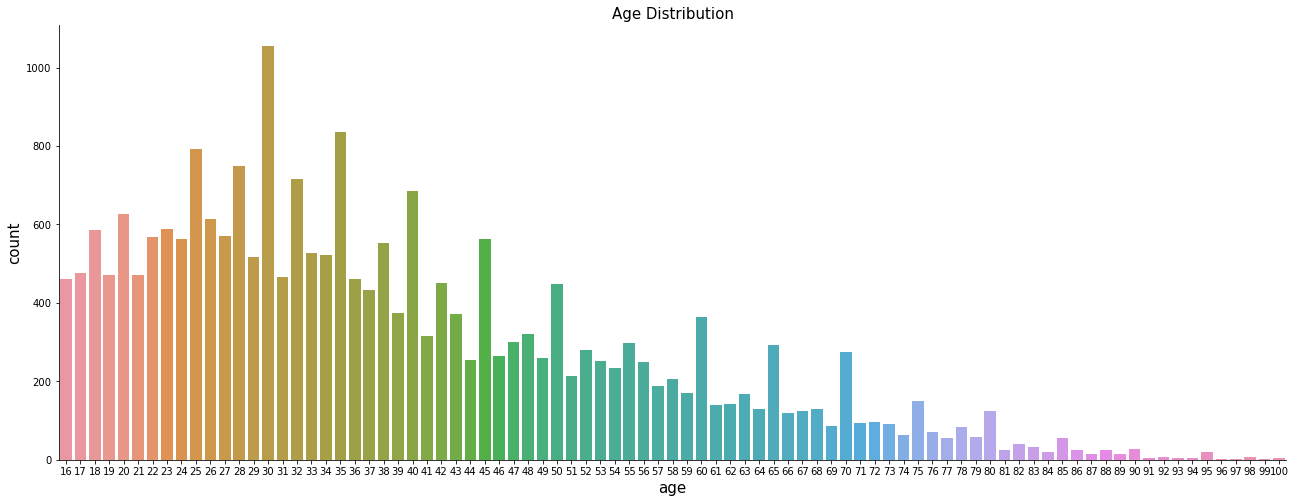

In [38]:
fig, ax =plt.subplots()
fig.set_size_inches(22,8)
sns.countplot(x = 'age_of_respondent', data = Train)
ax.set_xlabel('age', fontsize =15)
ax.set_ylabel('count',fontsize =15)
ax.set_title('Age Distribution',fontsize =15)
sns.despine()


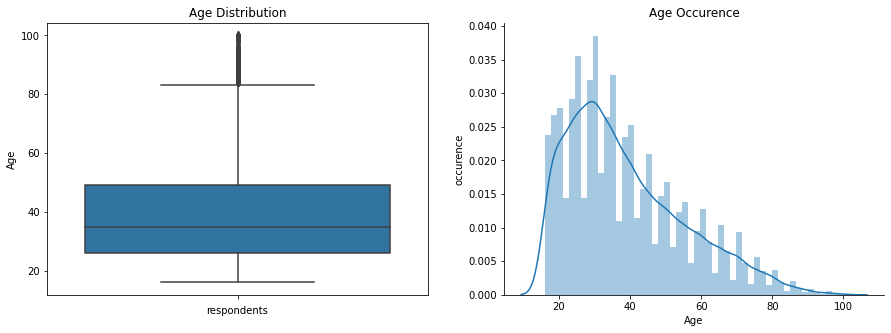

In [60]:
#Plotting a boxplot and a distplot

fig,(ax1,ax2) =plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
sns.boxplot(y ='age_of_respondent', data =Train, ax = ax1)
ax1.set_xlabel('respondents')
ax1.set_ylabel('Age')

ax1.set_title('Age Distribution')

sns.distplot(Train['age_of_respondent'],ax =ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('occurence')
ax2.set_title('Age Occurence')

sns.despine(ax =ax2)

In [62]:
# Calculating quartile
print('Lower quartile:',Train['age_of_respondent'].quantile(q = 0.25))
print('median:',Train['age_of_respondent'].quantile(q = 0.5))
print('upper quartile:',Train['age_of_respondent'].quantile(q = 0.75))

Lower quartile: 26.0
median: 35.0
upper quartile: 49.0


## Household size

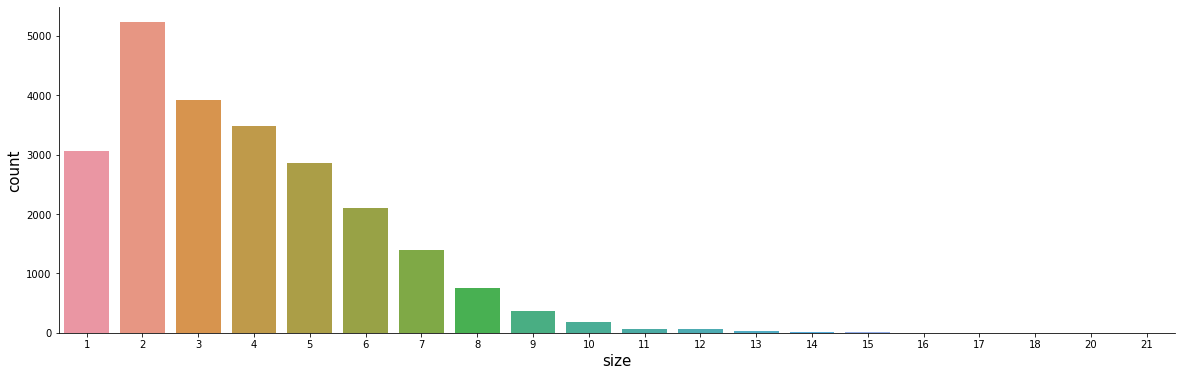

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
sns.countplot('household_size', data = Train)
ax.set_xlabel('size',fontsize =15)
ax.set_ylabel('count',fontsize =15)
sns.despine()

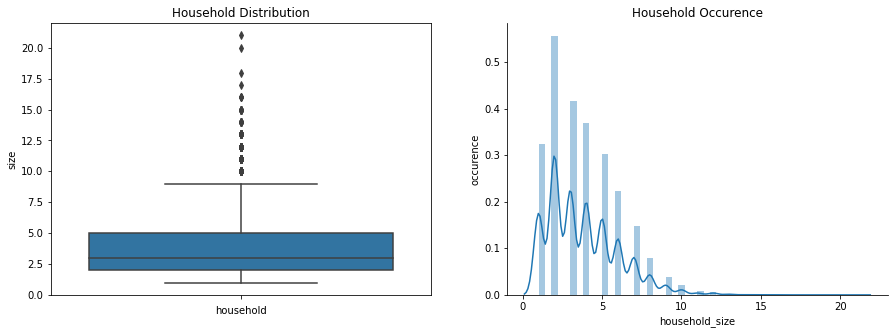

In [81]:
fig,(ax1,ax2) =plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
sns.boxplot(y ='household_size', data =Train, ax = ax1)
ax1.set_xlabel('household')
ax1.set_ylabel('size')

ax1.set_title('Household Distribution')

sns.distplot(Train['household_size'],ax =ax2)
ax2.set_xlabel('household_size')
ax2.set_ylabel('occurence')
ax2.set_title('Household Occurence')

sns.despine(ax =ax2)

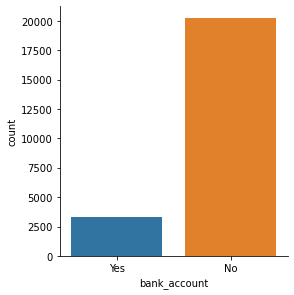

In [92]:
# Exploring target distribution
sns.catplot(x = 'bank_account', kind = 'count',height = 4, data = Train)
sns.despine()

In [ ]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Encoding categorical data
le = LabelEncoder()
Train['bank_account'] = le.fit_transform(Train['bank_account'])

# Separating Training features from target
X_train = Train.drop(['bank_account'], axis = 1)
Y_train = Train['bank_account']

In [ ]:
Train.info()

In [ ]:
Train.columns

In [ ]:
Train['cellphone_access'].unique()

In [ ]:
for i in Train.columns:
    print(i ,'=', Train[i].unique())

In [ ]:
# Function to preprocess data

def preprocessing_data(data):
   
    #Categorical features
    categ = ['relationship_with_head','marital_status', 'education_level','job_type','country']
    
    #One Hot Encode
    data = pd.get_dummies(data, prefix_sep = '_', columns = categ)
    
    # Label Encoding
    data['location_type'] = le.fit_transform(data['location_type'])
    data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
    data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])
    
    #dropping column id
    data = data.drop(['uniqueid'], axis = 1)
    
    
    
    return data   
    
    
    

In [ ]:
Preprocessed_Train = preprocessing_data(X_train)
Preprocessed_Test = preprocessing_data(Test)
sample = preprocessing_data(Train)
sample.sample(5)

In [ ]:
corr_matrix = sample.corr()
corr_matrix.head()

In [ ]:
target_corr = corr_matrix['bank_account']
target_corr[target_corr.abs()< 0.02]

In [ ]:
target_corr = corr_matrix['bank_account']
target_corr[target_corr.abs()< 0.03]

In [ ]:
for i in target_corr[target_corr.abs()< 0.03]:
    print(i)

In [ ]:
Preprocessed_Train =Preprocessed_Train.drop(['relationship_with_head_Other non-relatives',
                          'marital_status_Dont know','education_level_Other/Dont know/RTA',
                          'job_type_Dont Know/Refuse to answer','job_type_Government Dependent',
                        'age_of_respondent','job_type_Self employed'], axis = 1)

In [ ]:
Preprocessed_Test =Preprocessed_Test.drop(['relationship_with_head_Other non-relatives',
                          'marital_status_Dont know','education_level_Other/Dont know/RTA',
                          'job_type_Dont Know/Refuse to answer','job_type_Government Dependent',
                        'age_of_respondent','job_type_Self employed'], axis = 1)

In [ ]:
# shape of processed train set
Preprocessed_Train.shape

In [ ]:
Train.shape

In [ ]:
# Scaling data into range 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
Preprocessed_Train= scaler.fit_transform(Preprocessed_Train)
Preprocessed_Train

In [ ]:
# Scaling data into range 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
Preprocessed_Test = scaler.fit_transform(Preprocessed_Test)

## Model Building

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_Train , X_Val, y_train, y_val = train_test_split(Preprocessed_Train, Y_train, stratify = Y_train,
                                                   test_size = 0.1, random_state = 42)


In [ ]:
X_Val.shape

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR()
classifier.fit(X_Train,y_train)

In [ ]:
y_pred = classifier.predict(X_Val)

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_val, y_pred)

In [ ]:
cm = confusion_matrix(y_val, y_pred)
cm

In [ ]:
# Getting Error rate
print('Error rate of LR: ',1- accuracy_score(y_val, y_pred))


## Prediction of the competition test dataset

In [ ]:
Preprocessed_Test.shape

In [ ]:
Test.bank_account = classifier.predict(Preprocessed_Test )
Test.bank_account

In [ ]:
# Create submission dataframe
submission = pd.DataFrame({'unique_id':Test['uniqueid'] +'x' + Test['country'],
                          'bank_account': Test.bank_account})

In [ ]:
submission.sample(5)

In [ ]:
# Creating a submission csv file

submission.to_csv('third_submission.csv', index = False)

In [ ]:
sub = pd.read_csv('third_submission.csv')

In [ ]:
sub.isnull().sum()